# GROUP PROPOSAL:

## Introduction

Basketball statistics are statistical measures of a player's performance throughout a game, typically collected through cameras feeding data into proprietary software in the NBA. These are analyzed to help teams identify who exceeds in specific areas and can determine whether the player receives bonus compensation. (Abeza et al., 2022) 

One study conducted using data from 2013-2014 season claimed only total points, personal fouls and rebounds are strong determinants of player salary. (Lyons et al., 2018) A study using data from 2017-2018 found that assists and experience were equally strong contributors. (Sigler et. al, 2018) In today's post-pandemic age, with some teams having tighter budgets than before, we are curious if certain variables effect salary. The question we hope to answer with our project is: **"Can we predict NBA player salary given basketball statistics collected in the 2021-2022 year?"** Furthermore, we want to test to see which basketball statistics actually enable players to have the highest salaries.

The dataset used is the 2021-2022 NBA Player Stats(from kaggle.com/datasets/vivovinco/nba-player-stats), which is an aggregate of NBA player stats from the 2021-2022 regular season. We obtained the salaries of each player from  an NBA Player Salaries dataset(from https://hoopshype.com/salaries/players/l/) which we merge with the other dataset.
The data contains stats of all NBA players from the season, each team playing 82 games. Our variables of interest will be determined using analysis techniques(confounding variables, correlation matrix). To keep our project manageable, only 13 of the 30 variables given will be reviewed. 

Response variable: 
- Salary : How much a player makes for the year 2021-2022 in $USD

13 possible variables:
- MP : Minutes played per game
- FG% : Field goal percentage
- 3P% : 3-point field goal percentage
- 2P% : 2-point field goal percentage
-  eFG% : Effective field goal percentage
- FT% : Free throw percentage
- TRB : Total rebounds per game
- AST : Assists per game
- STL : Steals per game
- BLK : Blocks per game
- TOV : Turnovers per game
- PF : Personal fouls per game
- PTS : Points per game

This dataset contains a total of 812 players.

## Preliminary Results

### Loading library

In [3]:
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(broom)
library(GGally)
library(rvest)
library(AER)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




ERROR: Error in library(AER): there is no package called ‘AER’


### Reading data: Player Data 
Since player data was found on Kaggle - data was downloaded and read in locally. 
This data set shows player stats for 217 NBA players in 2021-2022. This includes 30 different columns of information, not all of which will be used. 

In [21]:
data <- read.csv("data.csv",sep=";")
head(data)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,⋯,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,⋯,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,⋯,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,⋯,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,⋯,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
6,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,⋯,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6


In [5]:
str(data)

'data.frame':	812 obs. of  30 variables:
 $ Rk    : int  1 2 3 4 5 6 6 6 7 8 ...
 $ Player: chr  "Precious Achiuwa" "Steven Adams" "Bam Adebayo" "Santi Aldama" ...
 $ Pos   : chr  "C" "C" "C" "PF" ...
 $ Age   : int  22 28 24 21 36 23 23 23 26 23 ...
 $ Tm    : chr  "TOR" "MEM" "MIA" "MEM" ...
 $ G     : int  73 76 56 32 47 65 50 15 66 56 ...
 $ GS    : int  28 75 56 0 12 21 19 2 61 56 ...
 $ MP    : num  23.6 26.3 32.6 11.3 22.3 22.6 26.3 9.9 27.3 32.3 ...
 $ FG    : num  3.6 2.8 7.3 1.7 5.4 3.9 4.7 1.1 3.9 6.6 ...
 $ FGA   : num  8.3 5.1 13 4.1 9.7 10.5 12.6 3.2 8.6 9.7 ...
 $ FG.   : num  0.439 0.547 0.557 0.402 0.55 0.372 0.375 0.333 0.448 0.677 ...
 $ X3P   : num  0.8 0 0 0.2 0.3 1.6 1.9 0.7 2.4 0 ...
 $ X3PA  : num  2.1 0 0.1 1.5 1 5.2 6.1 2.2 5.9 0.2 ...
 $ X3P.  : num  0.359 0 0 0.125 0.304 0.311 0.311 0.303 0.409 0.1 ...
 $ X2P   : num  2.9 2.8 7.3 1.5 5.1 2.3 2.8 0.4 1.5 6.6 ...
 $ X2PA  : num  6.1 5 12.9 2.6 8.8 5.3 6.5 1 2.7 9.6 ...
 $ X2P.  : num  0.468 0.548 0.562 0.56 0.

### Reading Data: Salary Data - from Web
Demonstrating that a dataset can be read from web, we found the salary of the 217 NBA players from 2021-2022. This only includes two columns - X1 (Player Name) and X2 (Player Salary) 

In [6]:
salary_html <- read_html("https://hoopshype.com/salaries/players/2021-2022.html") %>%
                html_nodes("tbody .name , tbody .hh-salaries-sorted") %>%
                html_text()
salary <- str_replace_all(salary_html, "[\t\n$,]" , "")
salary_data = data.frame(matrix(salary,ncol=2,byrow=T),
                stringsAsFactors=FALSE)
head(salary_data)

,X1,X2
,<chr>,<chr>
1,Stephen Curry,48070014
2,John Wall,47345760
3,Russell Westbrook,47063478
4,LeBron James,44474988
5,Kevin Durant,44119845
6,Bradley Beal,43279250


### Merging Datasets
In order to create the final dataset to use, we combine the two datasets to add Salary into the the player data collected from Kaggle - with the X1 column being the same as the player column in order to ensure that the salary column is associated with the right players. 

In [7]:
data_all <- merge(data, salary_data, by.x = "Player", by.y = "X1")
head(data_all)

,Player,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,X2
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Aaron Gordon,198,PF,26,DEN,75,75,31.7,5.8,11.1,⋯,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,19690909
2,Aaron Holiday,244,PG,25,TOT,63,15,16.2,2.4,5.4,⋯,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,1968175
3,Aaron Holiday,244,PG,25,WAS,41,14,16.2,2.4,5.2,⋯,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1,1968175
4,Aaron Holiday,244,PG,25,PHO,22,1,16.3,2.3,5.6,⋯,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8,1968175
5,Aaron Nesmith,406,SF,22,BOS,52,3,11.0,1.4,3.5,⋯,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,3804360
6,Aaron Wiggins,581,SG,23,OKC,50,35,24.2,3.1,6.7,⋯,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,1563518


### Wrangling data
We change the column name X2 to Salary and the type to numeric (for simplicity), remove the 17 other columns we won't be using and remove any NULLs that may be present. 

In [8]:
colnames(data_all)[which(names(data_all) == "X2")] <- "SALARY"
head(data_all)

,Player,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SALARY
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Aaron Gordon,198,PF,26,DEN,75,75,31.7,5.8,11.1,⋯,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,19690909
2,Aaron Holiday,244,PG,25,TOT,63,15,16.2,2.4,5.4,⋯,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,1968175
3,Aaron Holiday,244,PG,25,WAS,41,14,16.2,2.4,5.2,⋯,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1,1968175
4,Aaron Holiday,244,PG,25,PHO,22,1,16.3,2.3,5.6,⋯,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8,1968175
5,Aaron Nesmith,406,SF,22,BOS,52,3,11.0,1.4,3.5,⋯,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,3804360
6,Aaron Wiggins,581,SG,23,OKC,50,35,24.2,3.1,6.7,⋯,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,1563518


In [17]:
clean_data <- data_all %>%
    select(-G, -GS, -FG, -FGA, -X3P, -X3PA, -X2P, -X2PA, -FT, -FTA, -ORB, -DRB, -Rk, -Player, -Tm, -Pos, -Age) %>%
    transform(SALARY = as.numeric(SALARY)) %>%
    filter_all(any_vars(! is.na(.)))
head(clean_data)

,MP,FG.,X3P.,X2P.,eFG.,FT.,TRB,AST,STL,BLK,TOV,PF,PTS,SALARY
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31.7,0.520,0.335,0.605,0.573,0.743,5.9,2.5,0.6,0.6,1.8,2.0,15.0,19690909
2,16.2,0.447,0.379,0.477,0.504,0.868,1.9,2.4,0.7,0.1,1.1,1.5,6.3,1968175
3,16.2,0.467,0.343,0.524,0.521,0.800,1.6,1.9,0.6,0.2,1.0,1.5,6.1,1968175
4,16.3,0.411,0.444,0.398,0.476,0.939,2.5,3.4,0.8,0.0,1.3,1.5,6.8,1968175
5,11.0,0.396,0.270,0.612,0.481,0.808,1.7,0.4,0.4,0.1,0.6,1.3,3.8,3804360
6,24.2,0.463,0.304,0.573,0.525,0.729,3.6,1.4,0.6,0.2,1.1,1.9,8.3,1563518


In [18]:
sapply(clean_data, function(x) sum(is.na(x))) #confirming there are no nulls

MP    FG.   X3P.   X2P.   eFG.    FT.    TRB    AST    STL    BLK    TOV 
     0      0      0      0      0      0      0      0      0      0      0 
    PF    PTS SALARY 
     0      0      0

No nulls in any column.

## Plotting Data
Visually explore the association between variables in the dataset using pair plots 

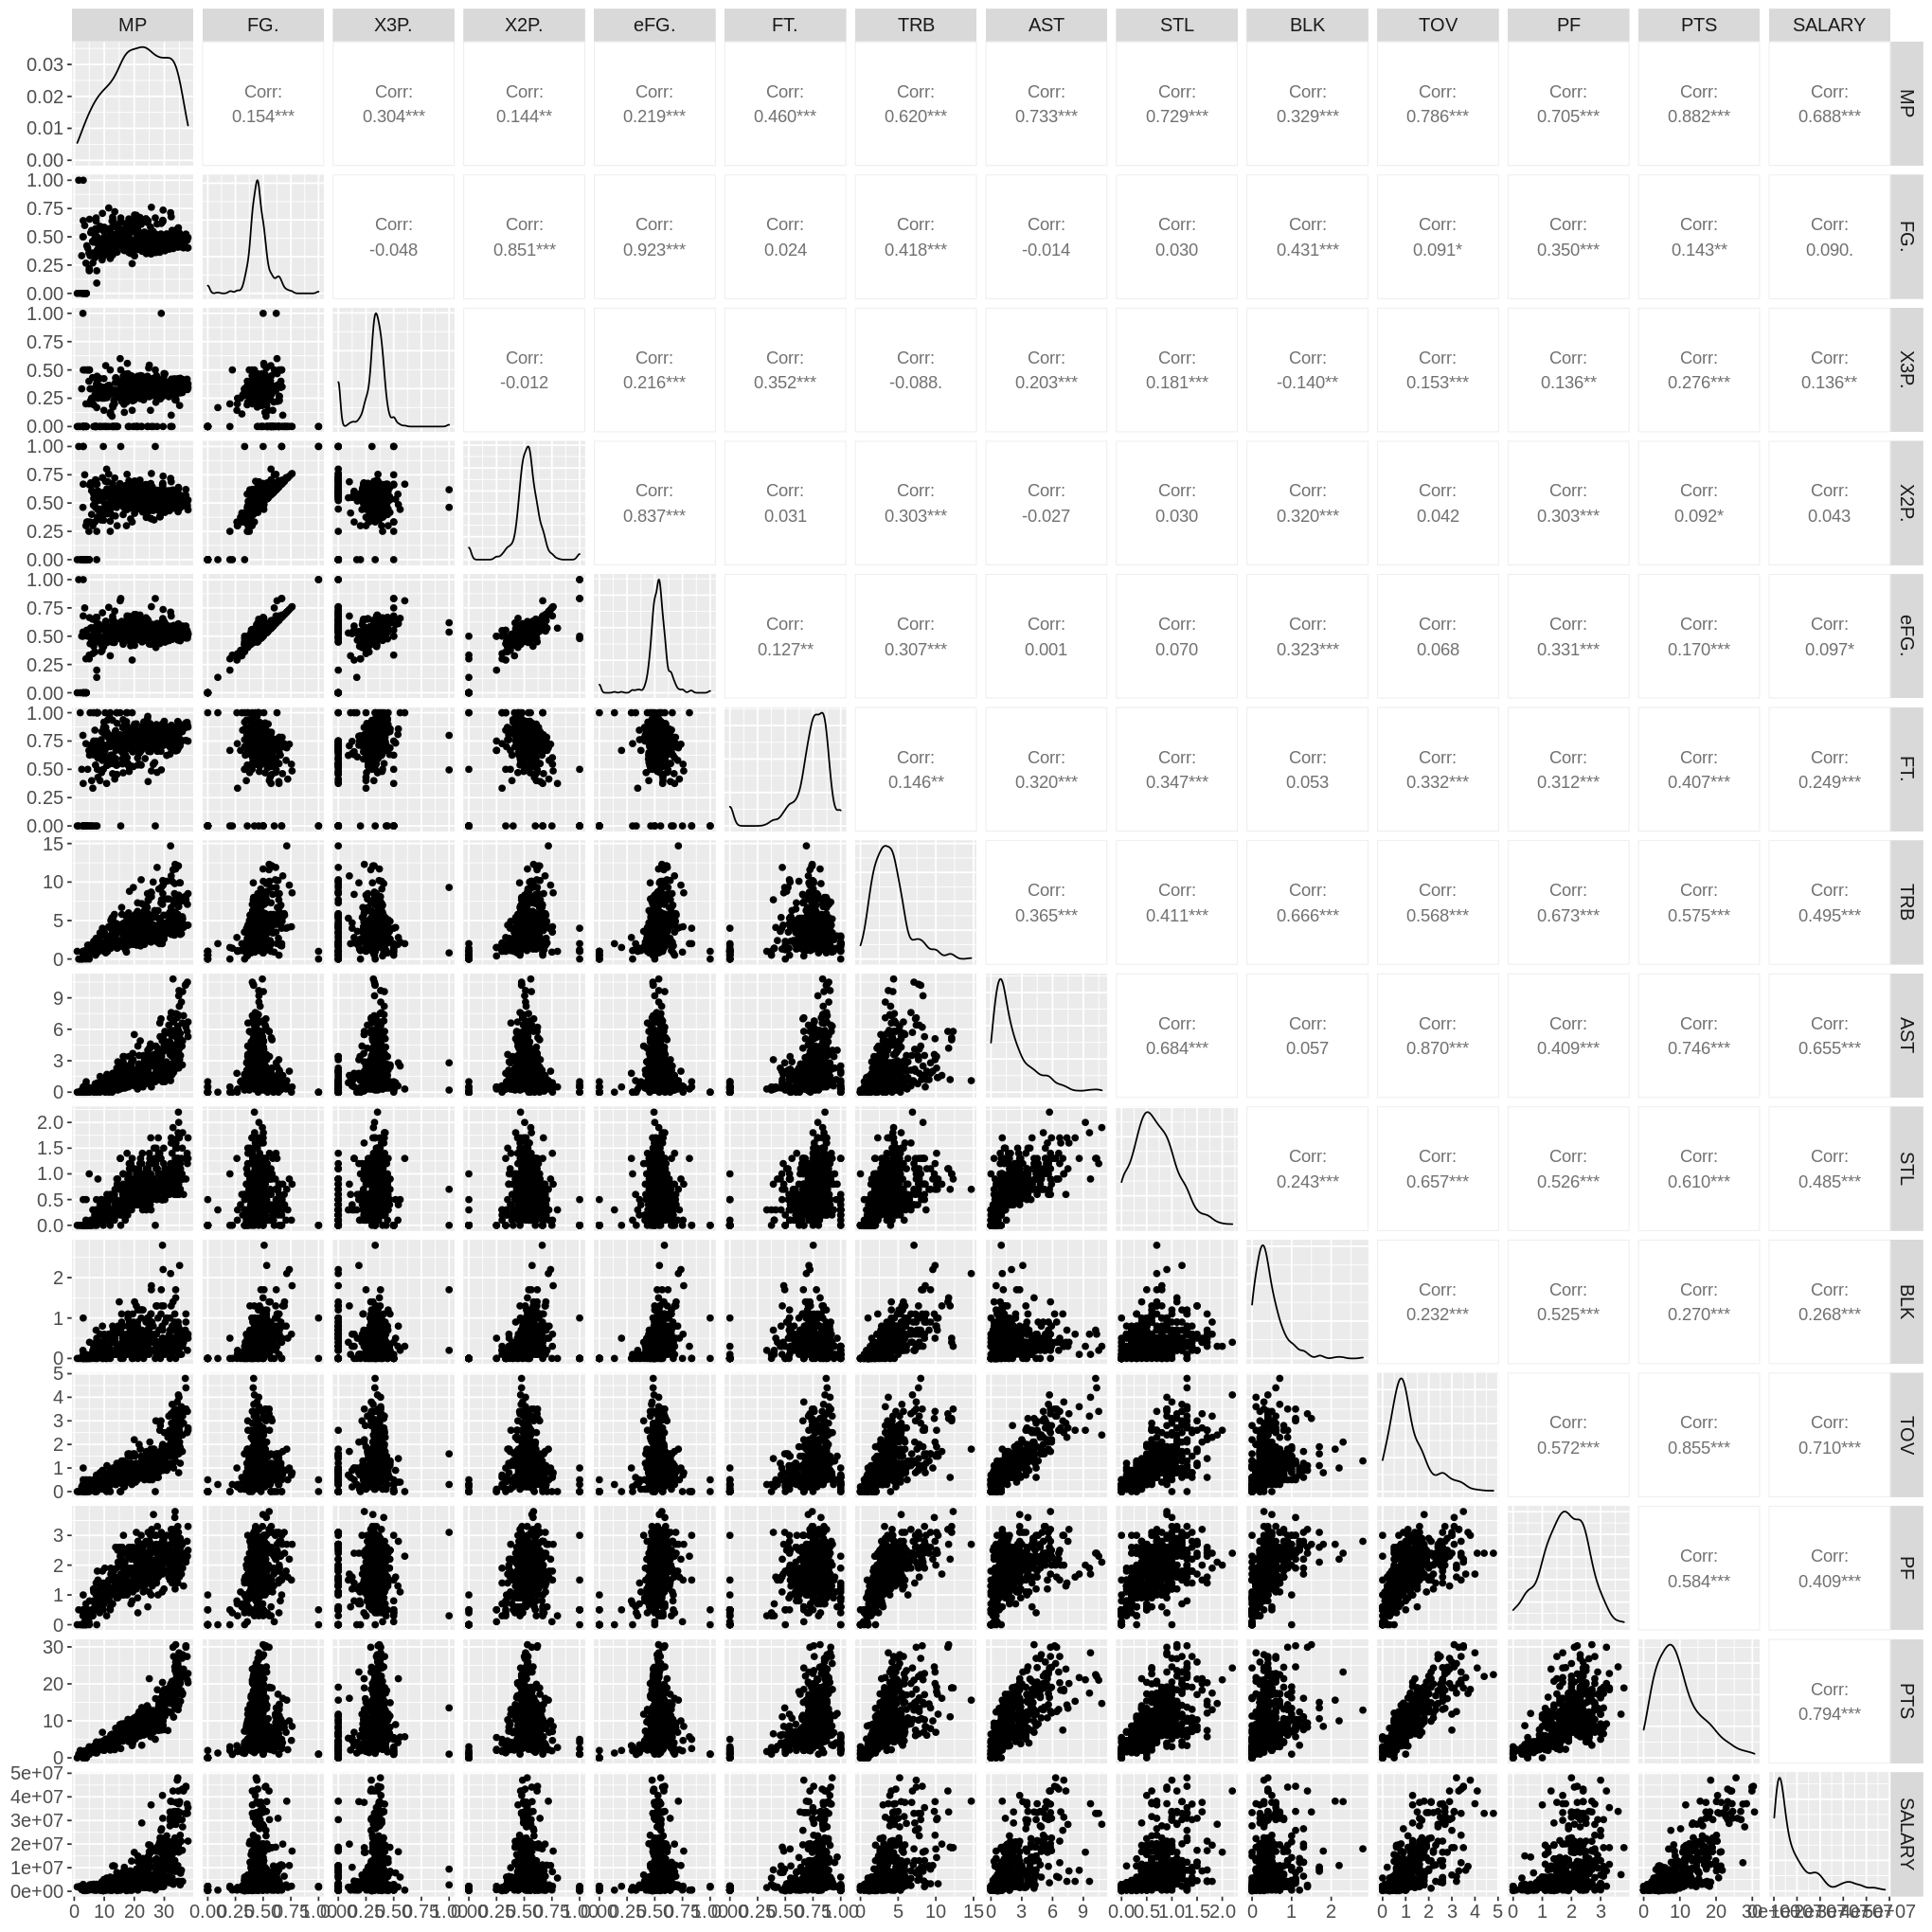

In [19]:
data_pair_plots <- 
  clean_data %>% 
  ggpairs() +
    theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
options(repr.plot.width = 17, repr.plot.height = 17)
data_pair_plots

In [20]:
corr_matrix <- clean_data %>% 
  select(-SALARY) %>% #salary not included as it is our response variable
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr") %>%
  filter(corr != 1) %>%
  arrange(desc(corr))
head(corr_matrix)

var1,var2,corr
<chr>,<chr>,<dbl>
FG.,eFG.,0.9225599
eFG.,FG.,0.9225599
MP,PTS,0.8818966
PTS,MP,0.8818966
AST,TOV,0.8695299
TOV,AST,0.8695299


From this we can see that there are quite a few variables can be considered highly correlated - introducing a 
multicollinearity problem, we will attempt to resolve this further in our analysis using either expert opinions or VIF.

## Methods: Plan
- For our project, we want to answer the question : "Can we predict NBA player salary given basketball statistics collected in the 2021-2022 year?" The main benefit of completing this project is that it gives NBA teams - who already have a budget of how much they can spend on their players - a better understanding of which players they should sign based on their stats, and how much this player is worth. 

- The method we will be using is a Multiple Linear Regression Analysis in order to create a model to predict salary. In order to better determine variables to be used, a visualization of the correlation matrix (a pairwise plot) was already completed. We will also be using the following evaluation metrics for our model: Mean Squared Error, R-squared, Adjusted R-squared, and Mallow's Cp. 

- The main goal we hope to achieve is to use the collected data to create a model to predict salary, that could theoretically be used by teams and a player's manager in order to negotiate salaries and contracts that best reflect how said player is doing, and establish a level of performance they expect from the player once signed to the team. 


## References

Abeza, G., O’Reilly, N., Nadeau, J., & Abdourazakou, Y. (2022). Big data in professional sport: the perspective of practitioners in the NFL, MLB, NBA, and NHL. Journal of Strategic Marketing, 1-21.

Lyons, Robert, Newton, J., & Livingston, A.(2018, June 19). NBA Players’ Pay and Performance: What Counts? The Sport Journal. https://thesportjournal.org/article/nba-players-pay-and-performance-what-counts/

Sigler, K. & Compton, W. (2018, July 13). Determinants of NBA Player Salaries. The Sport Journal. https://thesportjournal.org/article/determinants-of-nba-player-salaries/